In [1]:
import json

# load IT skill JDs
def load_data_skill(filename):
    with open(filename, 'r') as f:
        data = json.load(f)

    f.close()
    
    return list(data)

total_skill_jds = load_data_skill('data/train/total_skill_jds.json')

In [2]:
def get_frequency_skill(skills_jds):

    frequency_skills = {}
    for skills in skills_jds:
        for skill in skills:
            if skill not in list(frequency_skills.keys()):
                frequency_skills[skill] = 1
            else:
                frequency_skills[skill] += 1

     # Sort the dictionary by frequency in descending order
    sorted_frequency_skills = dict(sorted(frequency_skills.items(), key=lambda item: item[1], reverse=True))
    
    return sorted_frequency_skills

In [22]:
from collections import defaultdict

def count_skills_with_frequency(skill_frequency, k):
    skills_with_k_frequency = [skill for skill, freq in skill_frequency.items() if freq == k]
    count = len(skills_with_k_frequency)
    return count

def statistical_num_frequency(skill_frequency):
    set_freq = set(list(skill_frequency.values()))
    result = defaultdict(int)
    for freq in set_freq:
        result[freq] = count_skills_with_frequency(skill_frequency, freq)

    return dict(sorted(result.items()))

In [14]:
frequency = get_frequency_skill(total_skill_jds)


In [23]:
statist_freq = statistical_num_frequency(frequency)

In [28]:
len(statist_freq)

334

In [32]:
import math

num_bin = math.ceil(math.sqrt(len(statist_freq)))
num_bin

19

AttributeError: Rectangle.set() got an unexpected keyword argument 'bins'

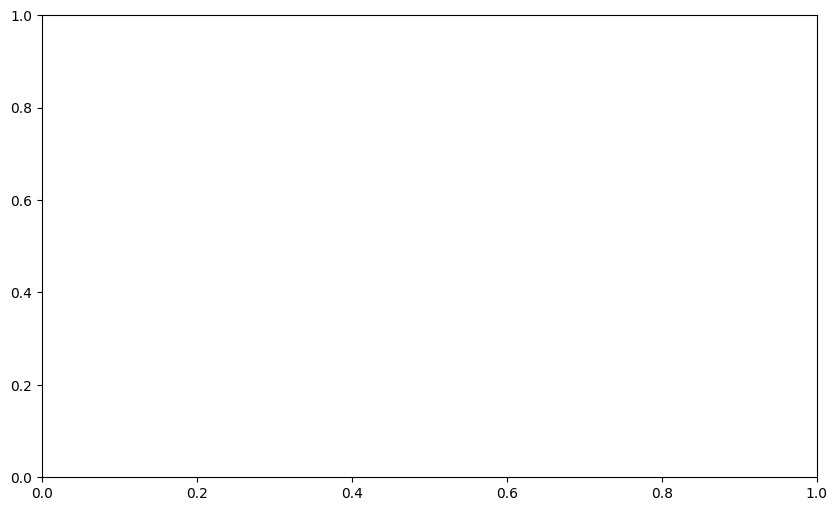

In [34]:
import matplotlib.pyplot as plt

# Create a bar chart to visualize the number of skills for each JD
plt.figure(figsize=(10, 6))  # Set the figure size (adjust as needed)
plt.bar(list(statist_freq.keys()), list(statist_freq.values()), bins=num_bin)
plt.xlabel('Number of Frequency')
plt.ylabel('Number of Skills')
plt.title('Number of Skills in Each Job Description')
plt.show()